<a href="https://colab.research.google.com/github/victorgrrtj/dmwork/blob/main/Horse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho DM

##Carregando a Base

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('drive/My Drive/Colab Notebooks/Projeto DM')

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as Pipe
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer

In [6]:
df_train = pd.read_csv('horsetrain.csv')
df_test = pd.read_csv('horsetest.csv')

In [ ]:
df_train

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [ ]:
df_test

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,1,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
1,no,adult,2,39.1,72.0,52.0,warm,NaN,bright_pink,less_3_sec,depressed,hypermotile,slight,none,none,NaN,absent,distend_small,50.0,7.8,NaN,NaN,lived,yes,2111,0,0,no
2,yes,adult,3,37.2,42.0,12.0,warm,normal,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_large,NaN,7.0,NaN,NaN,lived,no,4124,0,0,no
3,no,young,4,38.0,92.0,28.0,normal,normal,bright_pink,less_3_sec,alert,hypomotile,slight,significant,NaN,7.2,normal,normal,37.0,6.1,clear,NaN,died,no,0,0,0,yes
4,yes,adult,5,37.6,64.0,21.0,normal,normal,bright_pink,less_3_sec,depressed,hypomotile,none,none,none,NaN,increased,distend_large,40.0,7.0,clear,NaN,lived,yes,4205,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,yes,adult,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lived,yes,2124,0,0,no
85,no,adult,86,38.6,45.0,16.0,warm,normal,bright_pink,less_3_sec,alert,hypermotile,NaN,NaN,NaN,NaN,normal,normal,43.0,58.0,NaN,NaN,lived,no,0,0,0,no
86,yes,adult,87,38.9,80.0,44.0,cool,reduced,pale_pink,less_3_sec,depressed,hypomotile,moderate,slight,less_1_liter,7.0,decreased,normal,54.0,6.5,serosanguious,NaN,died,yes,7111,0,0,no
87,yes,adult,88,37.0,66.0,20.0,normal,reduced,bright_pink,less_3_sec,severe_pain,hypomotile,moderate,none,NaN,NaN,normal,distend_large,35.0,6.9,cloudy,NaN,died,yes,31110,0,0,no


## Análise Exploratória

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

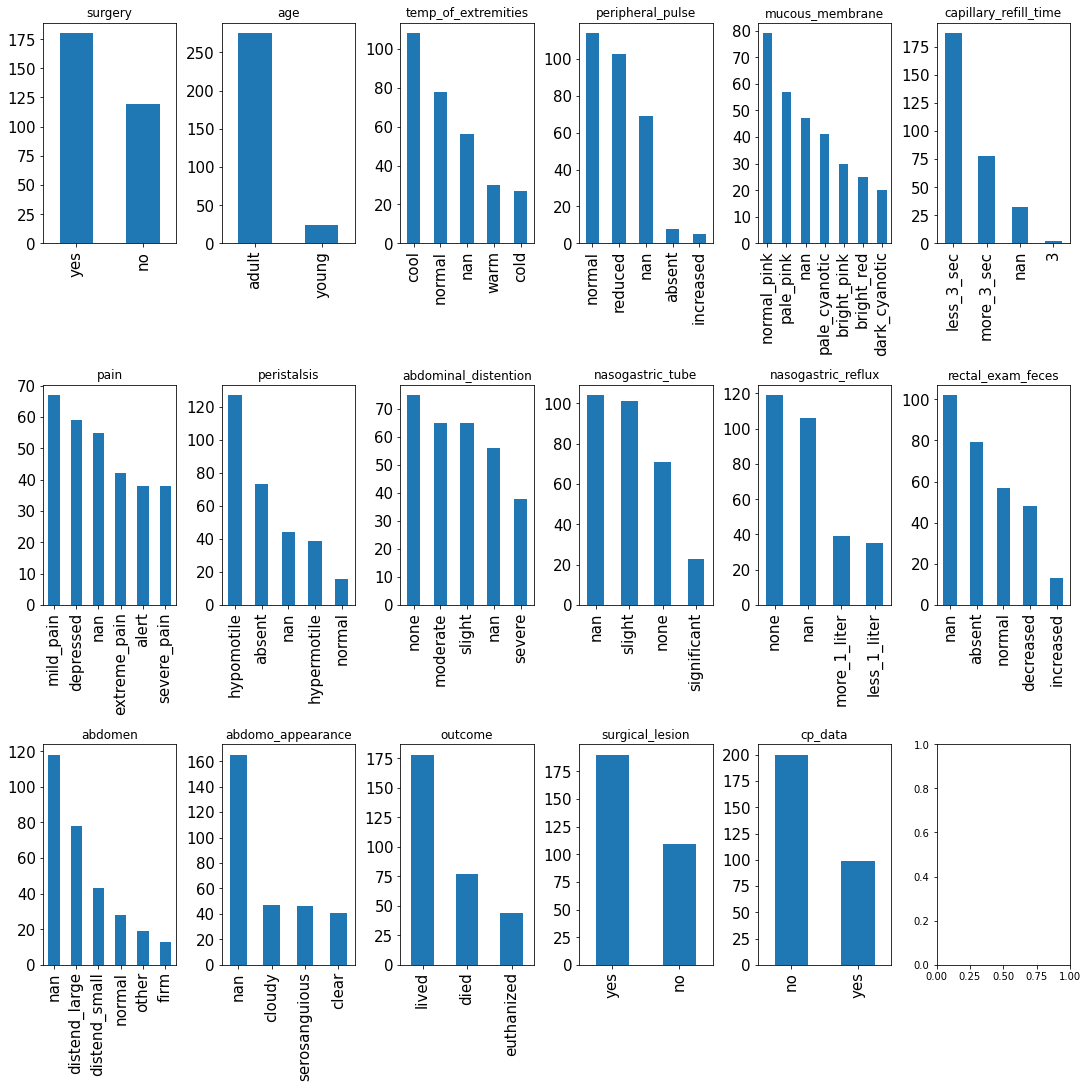

In [ ]:
categorical_features = list(df_train.select_dtypes(include=['object']).columns)
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(15, 15), constrained_layout = True)
axe = ax.ravel()
for i, categorical_feature in enumerate(df_train[categorical_features]):
    df_train[categorical_feature].value_counts(dropna=False).plot(kind="bar", ax=axe[i], fontsize=15).set_title(categorical_feature)
fig.show()

In [ ]:
df_train.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


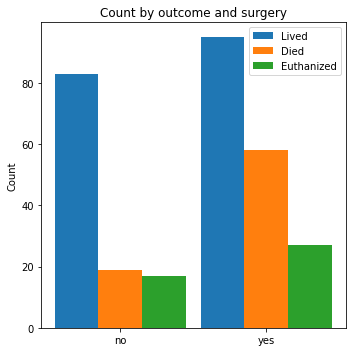

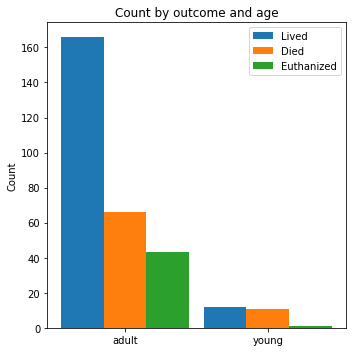

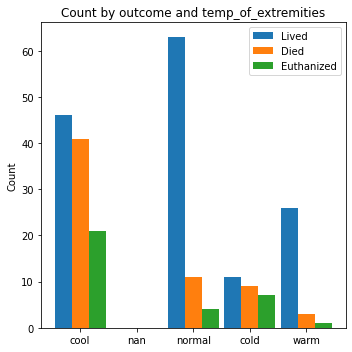

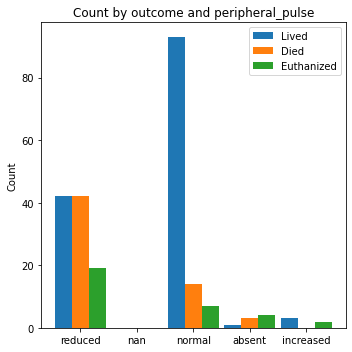

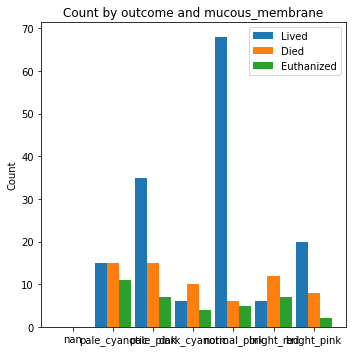

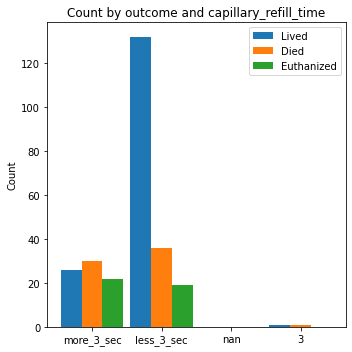

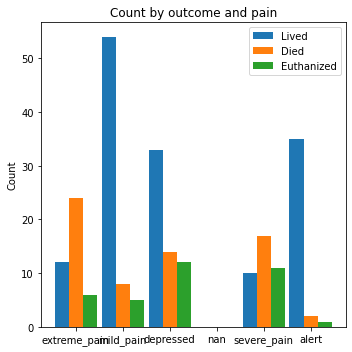

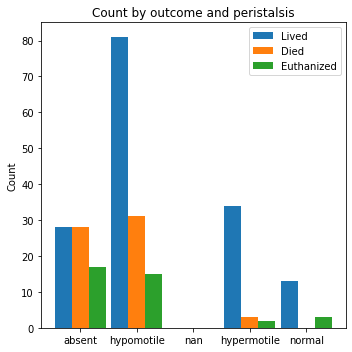

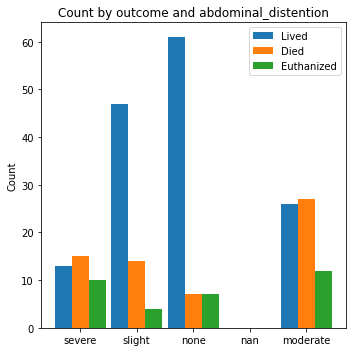

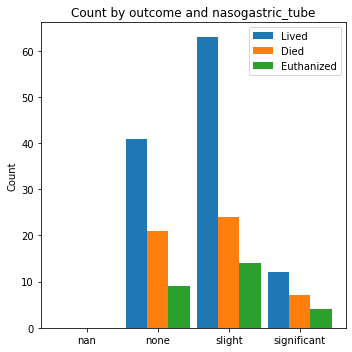

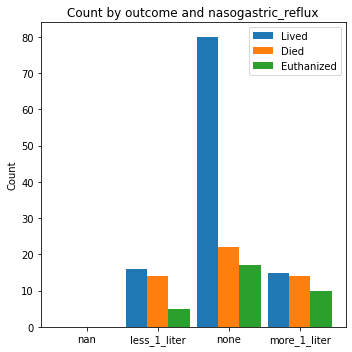

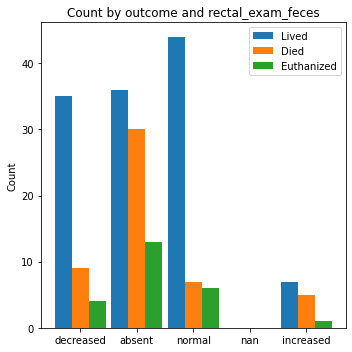

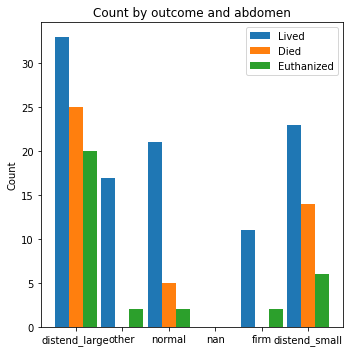

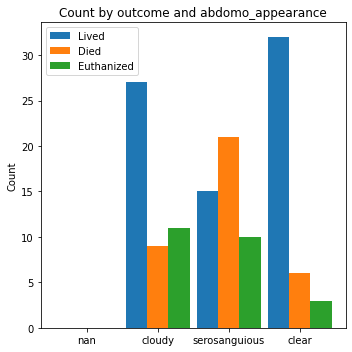

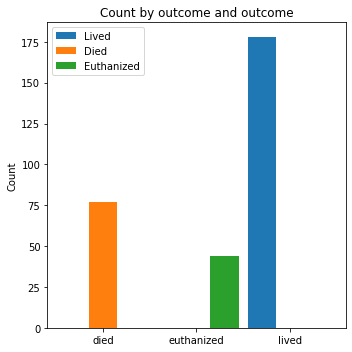

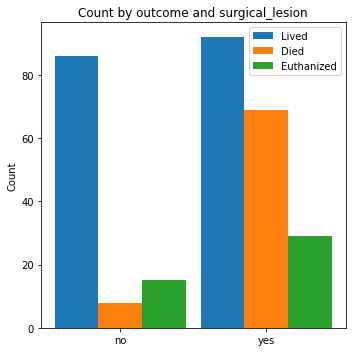

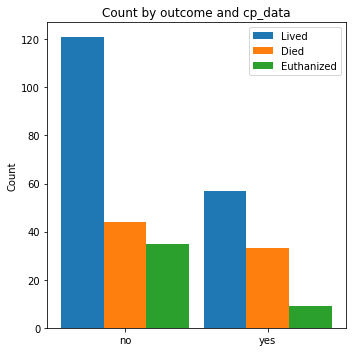

In [ ]:
for i in list(df_train.select_dtypes(include=['object']).columns):
    labels = df_train[i].unique()
    died = [(df_train[(df_train[i] == y) & (df_train['outcome'] == 'died')]['outcome'].count()) for y in labels]
    lived = [(df_train[(df_train[i] == y) & (df_train['outcome'] == 'lived')]['outcome'].count()) for y in labels]
    euthanized = [(df_train[(df_train[i] == y) & (df_train['outcome'] == 'euthanized')]['outcome'].count()) for y in labels]

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots(figsize = (5, 5))

    rects1 = ax.bar(x - width, lived, width, label='Lived')
    rects2 = ax.bar(x, died, width, label='Died')
    rects3 = ax.bar(x + width, euthanized, width, label='Euthanized')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Count')
    ax.set_title(f'Count by outcome and {i}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

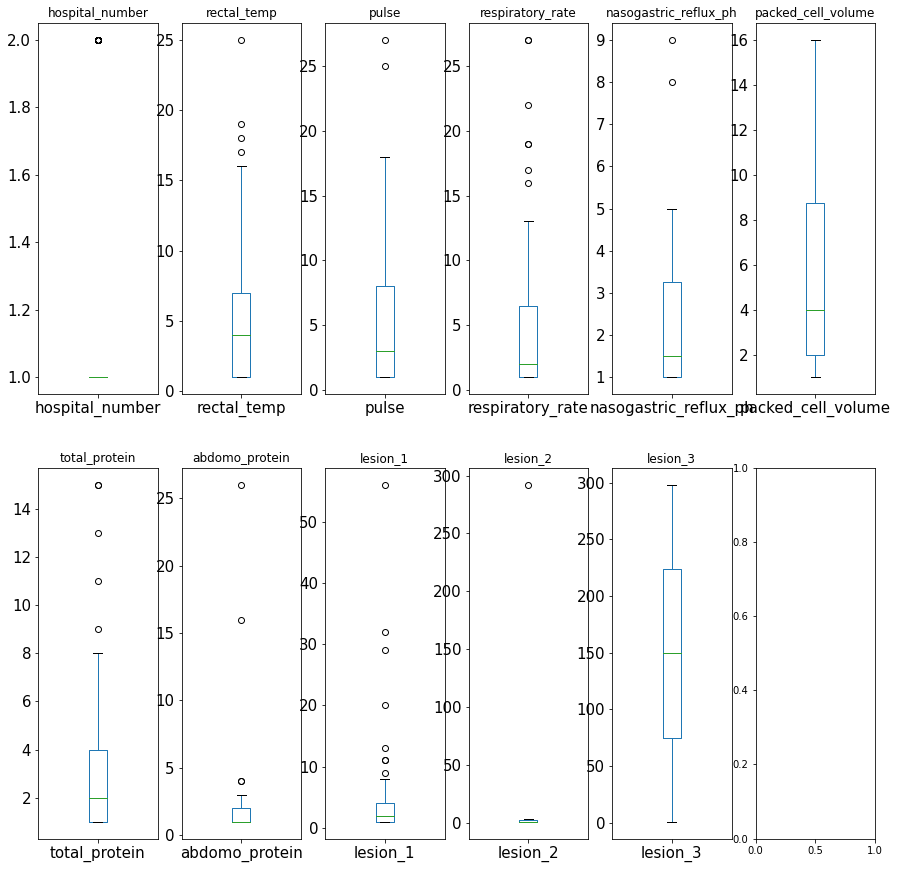

In [ ]:
numeric_features = list(df_train.select_dtypes(exclude=['object']).columns)
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 15))
axe = ax.ravel()
for i, numeric_feature in enumerate(df_train[numeric_features]):
    df_train[numeric_feature].value_counts().plot(kind="box", ax=axe[i], fontsize=15).set_title(numeric_feature)
plt.show()

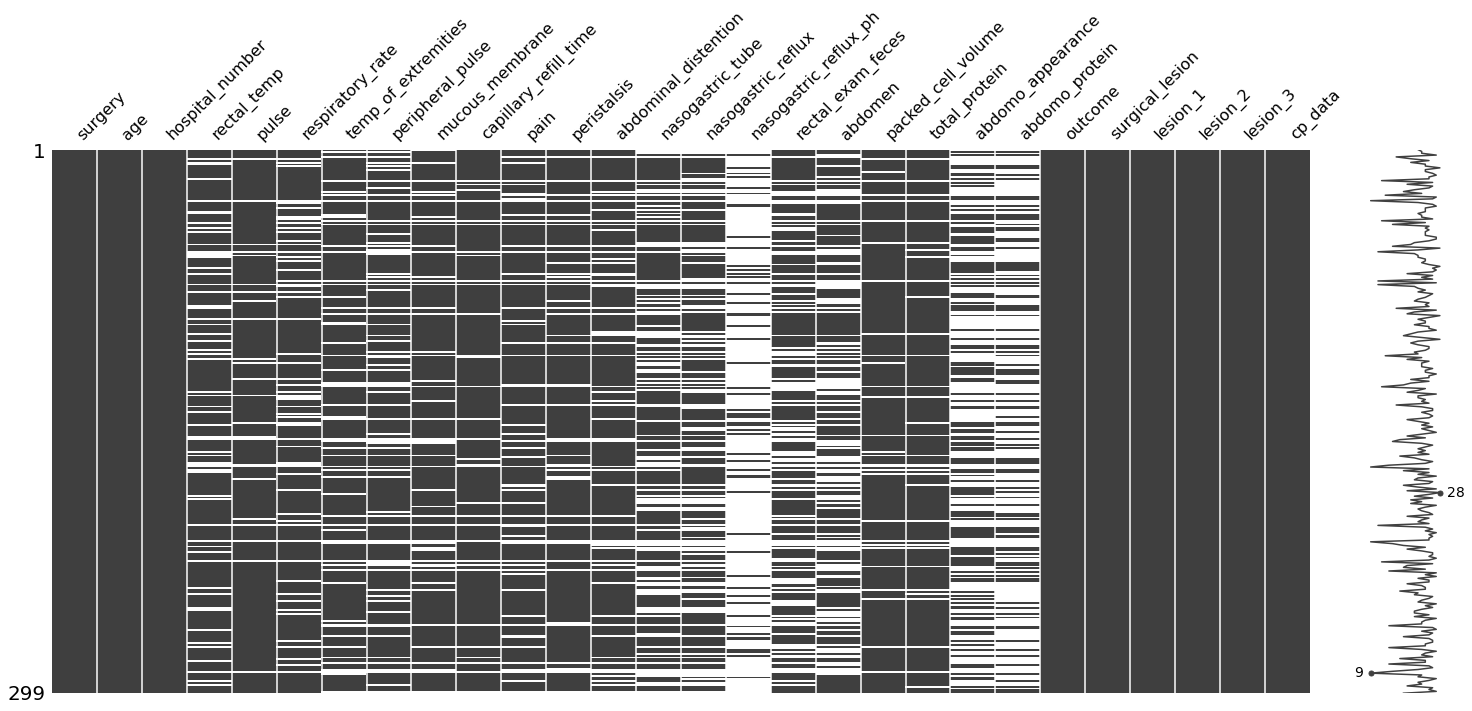

In [ ]:
msno.matrix(df_train)

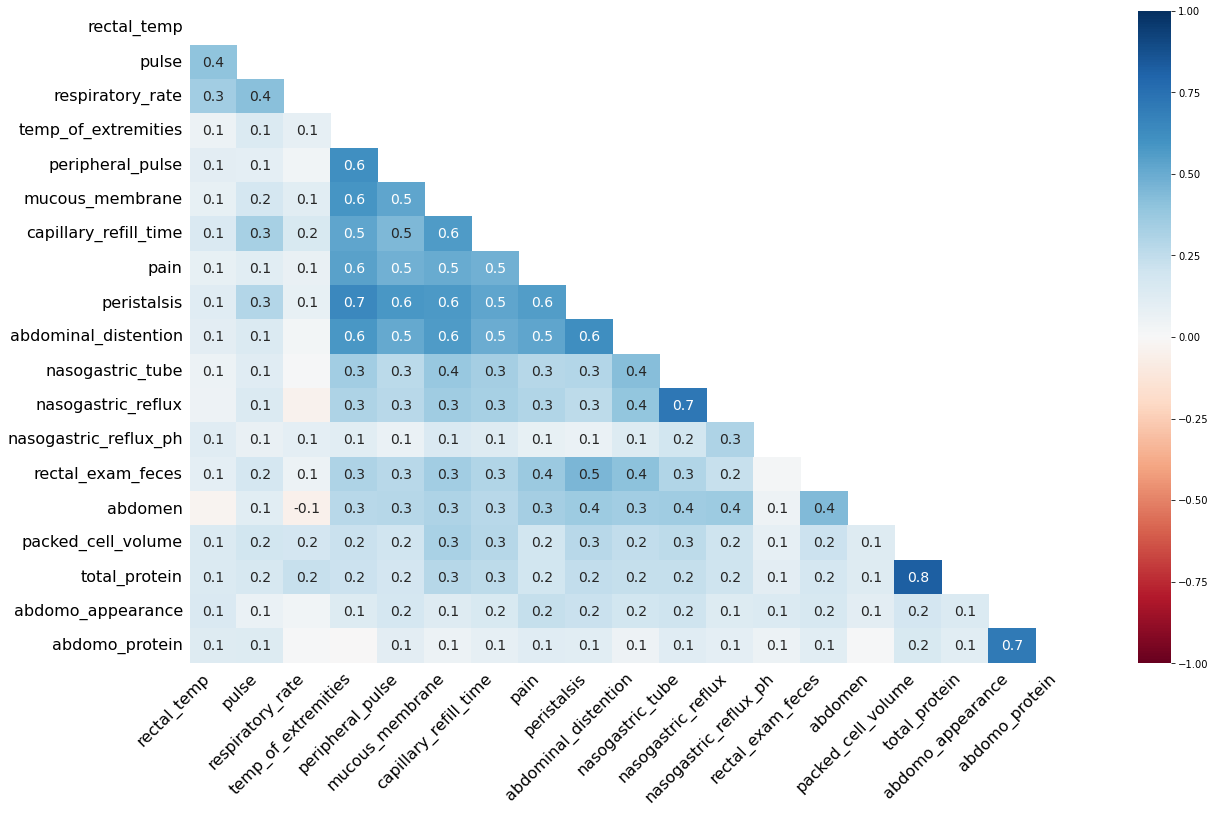

In [ ]:
msno.heatmap(df_train)

In [ ]:
df_train

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


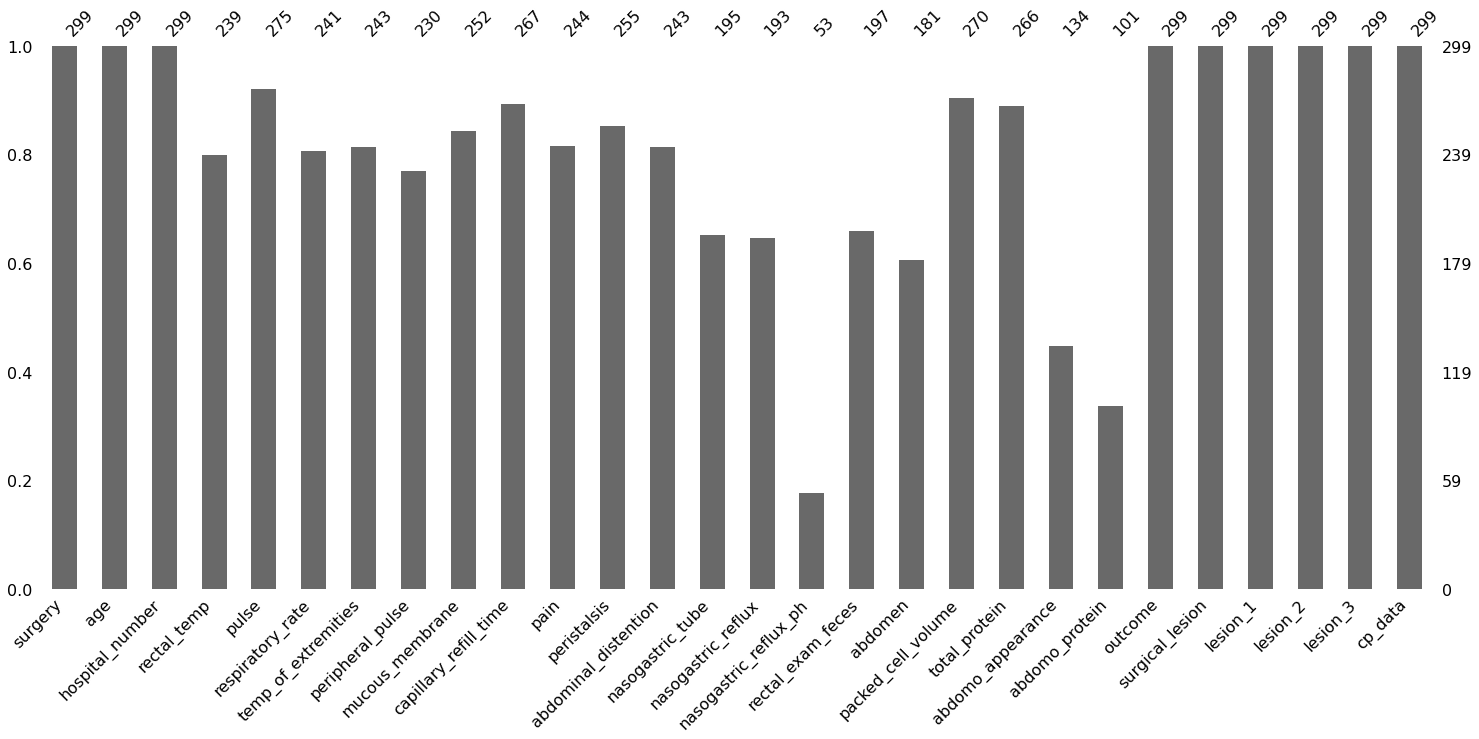

In [ ]:
msno.bar(df_train)

In [ ]:
df_train_copy = df_train.copy()

In [ ]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

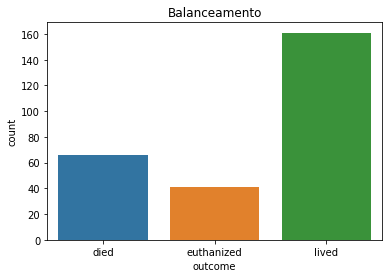

lived         161
died           66
euthanized     41
Name: outcome, dtype: int64


In [12]:
# Balanceamento
sns.countplot(data=X_train, x=y_train)
plt.title('Balanceamento')
plt.show()
print(y_train.value_counts())

In [ ]:
df_train_copy = df_train.copy()
df_train_copy.drop(columns=['nasogastric_reflux_ph', 'hospital_number'], inplace=True)
subset = []
for i in list(df_train_copy.columns):
  if df_train_copy[i].isnull().values.any():
    subset.append(i)
for y in range(len(subset)):
  df_train_copy.dropna(thresh = y + 1, subset = subset, inplace=True)
  print(f"Para thresh = {y + 1} , o dataframe fica com {len(df_train_copy)} linhas. Perda de informação: {round(((299 - len(df_train_copy))/299) * 100, 2)}% ")
  df_train_copy = df_train.copy()

Para thresh = 1 , o dataframe fica com 295 linhas. Perda de informação: 1.34% 
Para thresh = 2 , o dataframe fica com 295 linhas. Perda de informação: 1.34% 
Para thresh = 3 , o dataframe fica com 291 linhas. Perda de informação: 2.68% 
Para thresh = 4 , o dataframe fica com 287 linhas. Perda de informação: 4.01% 
Para thresh = 5 , o dataframe fica com 285 linhas. Perda de informação: 4.68% 
Para thresh = 6 , o dataframe fica com 280 linhas. Perda de informação: 6.35% 
Para thresh = 7 , o dataframe fica com 275 linhas. Perda de informação: 8.03% 
Para thresh = 8 , o dataframe fica com 272 linhas. Perda de informação: 9.03% 
Para thresh = 9 , o dataframe fica com 267 linhas. Perda de informação: 10.7% 
Para thresh = 10 , o dataframe fica com 257 linhas. Perda de informação: 14.05% 
Para thresh = 11 , o dataframe fica com 246 linhas. Perda de informação: 17.73% 
Para thresh = 12 , o dataframe fica com 236 linhas. Perda de informação: 21.07% 
Para thresh = 13 , o dataframe fica com 221 li

## Pré Processamento

In [7]:
# pré processamento na base de treino para excluir linhas com muitos dados faltantes
subset = []
for i in list(df_train.columns):
 if df_train[i].isnull().values.any():
  subset.append(i)
df_train.dropna(thresh = 9, subset = subset, inplace=True)

In [7]:
df_train.shape

(268, 28)

In [6]:
# define as colunas 'lesion_1', 'lesion_2', 'lesion_3' como categorias
"""def cols_to_categorical(base):
  cols_to_categorical = ['lesion_1', 'lesion_2', 'lesion_3']
  for col in base.columns:
    if col in cols_to_categorical:
      base[col] = base[col].astype('category')"""

In [8]:
# divide as bases em treino e teste
X_train = df_train.loc[:, df_train.columns != 'outcome']
y_train = df_train['outcome']
X_test = df_test.loc[:, df_test.columns != 'outcome']
y_test = df_test['outcome']

In [8]:
"""cols_to_categorical(X_train)
cols_to_categorical(X_test)"""

In [11]:
print(X_train.shape)
print(X_test.shape)

(268, 27)
(89, 27)


In [9]:
#Criação de transformer para alterar o tipo de dado das colunas 'lesion_1', 'lesion_2' e 'lesion_3'
def to_category(x):
  return pd.DataFrame(x).astype('category')

lesion_transformer = FunctionTransformer(to_category)

lesion_features = [
                   'lesion_1',
                   'lesion_2',
                   'lesion_3']

#RandomOverSampler
ros = RandomOverSampler(random_state=1)

#RandomUnderSampler
rus = RandomUnderSampler(random_state=1)

#deleta colunas com pouca/nenhuma informação
to_delete = ['hospital_number', 'nasogastric_reflux_ph']

# Classes numéricas - Preenche linhas vazias pela média e normaliza
numeric_features = [
 'rectal_temp',
 'pulse',
 'respiratory_rate', 
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein']
numeric_transformer = Pipe(steps=[
    ('imputernum', SimpleImputer()),
    ('scaler', StandardScaler())])

# Classes categóricas - Preenche linhas vazias pela moda e aplica one hot encoder
categorical_features = [
 'surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'surgical_lesion',
 'lesion_1',
 'lesion_2',
 'lesion_3',
 'cp_data']
categorical_transformer = Pipe(steps=[
  ('imputercat', SimpleImputer(strategy='most_frequent')),                                         
  ('hot', OneHotEncoder(handle_unknown='ignore'))])

#transforma a classe
preprocessor = ColumnTransformer(
    transformers=[
                  ('les', lesion_transformer, lesion_features),
                  ('del', 'drop', to_delete),
                  ('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)])

## Modelagem

In [10]:
def predict_and_evaluate(X_test, y_test):

  y_pred = clf.predict(X_test) #inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  #F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, average = 'weighted')
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Lived', 'Died', 'Euthanized']) 
  ax.yaxis.set_ticklabels(['Lived', 'Died', 'Euthanized'])
  plt.show()

### Regressão Logística

Acurácia:  0.8314606741573034
Kappa:  0.7238311956971453
F1:  0.8396475739911576


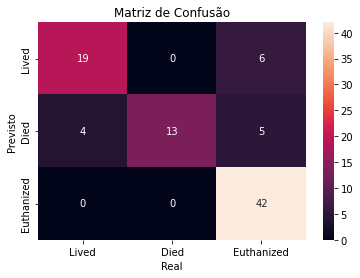

In [15]:
## Regressão Logistica, RandomUnderSampler

clf = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('rus', rus),
                      ('classifier', LogisticRegression(max_iter=1000))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

Acurácia:  0.8876404494382022
Kappa:  0.8049956178790535
F1:  0.8886972398825408


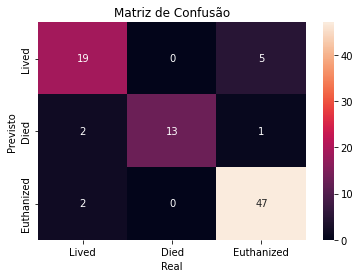

In [16]:
## Regressão Logistica com RandomOverSampler

clf = Pipe(steps=[('preprocessor', preprocessor),
                  ('ros', ros),
                  ('classifier', LogisticRegression(max_iter=1000))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

Acurácia:  0.9101123595505618
Kappa:  0.8310393925011865
F1:  0.9069689673622259


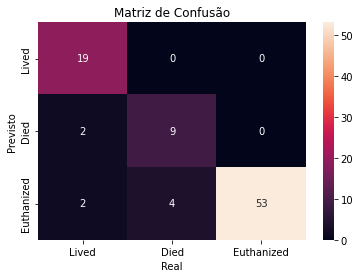

In [17]:
## Regressão logistica sem Balanceamento

clf = Pipe(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

In [18]:
#Regressão Logística GridSearch com RandomOverSampler

pipe = Pipe(steps=[('preprocessor', preprocessor),
                   ('ros', ros),
                   ('classiffier', LogisticRegression(random_state=1, max_iter=10000))])

param_grid = {'preprocessor__num__imputernum__strategy' : ['mean', 'median'],
              'classiffier__C' : [0.1, 10, 100],
              'classiffier__solver' : ['liblinear', 'saga']}
grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        died       0.76      0.83      0.79        23
  euthanized       0.61      0.85      0.71        13
       lived       0.91      0.79      0.85        53

    accuracy                           0.81        89
   macro avg       0.76      0.82      0.78        89
weighted avg       0.83      0.81      0.81        89



In [19]:
grid_search.best_params_

{'classiffier__C': 0.1,
 'classiffier__solver': 'saga',
 'preprocessor__num__imputernum__strategy': 'mean'}

Acurácia:  0.9101123595505618
Kappa:  0.8310393925011865
F1:  0.9069689673622259


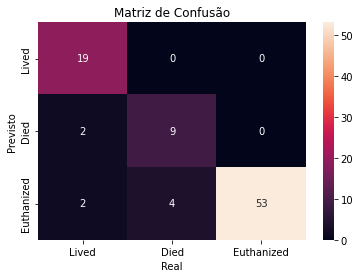

In [20]:
## Regressão Logistica sem balanceamento

# pipeline cotendo o pré processamento e o classificador
clf_reg2 = Pipe(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(max_iter=1000, C=0.1, solver = 'saga'))])

clf_reg2.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

Acurácia:  0.9101123595505618
Kappa:  0.8310393925011865
F1:  0.9069689673622259


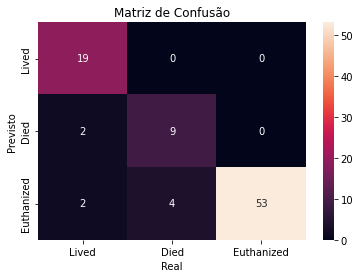

In [21]:
## Regressão Logistica com RandomOverSampler

# pipeline cotendo o pré processamento e o classificador
clf_reg2 = Pipe(steps=[('preprocessor', preprocessor),
                       ('ros', ros),
                       ('classifier', LogisticRegression(max_iter=1000, C=0.1, solver = 'saga'))])

clf_reg2.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

### SVM

Acurácia:  0.7865168539325843
Kappa:  0.6509083402146987
F1:  0.7929272332669838


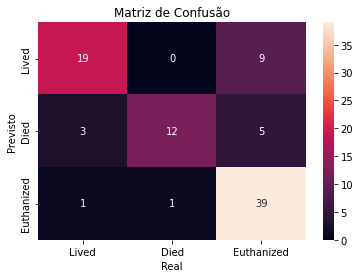

In [23]:
## SVM, RandomUnderSampler

clf = Pipe(steps=[('preprocessor', preprocessor),
                  ('ros', ros),
                  ('classifier', SVC(random_state=1))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

Acurácia:  0.8876404494382022
Kappa:  0.787792083929423
F1:  0.8763279098140128


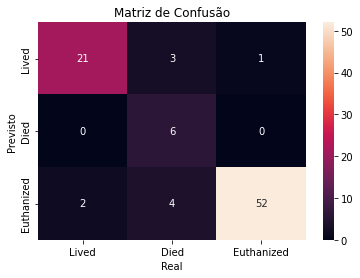

In [24]:
## SVM, sem balanceamento

clf = Pipe(steps=[('preprocessor', preprocessor),
                  ('classifier', SVC(random_state=1))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

In [31]:
#GridSearch com RandomUnderSampler

pipe = Pipe(steps=[('preprocessor', preprocessor),
                   ('rus', rus),
                   ('classiffier', SVC(random_state=1))])

param_grid = {'classiffier__C': [0.1, 1, 10, 100, 1000],
              'classiffier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'classiffier__kernel': ['rbf']}

grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        died       0.56      0.78      0.65        23
  euthanized       0.45      0.38      0.42        13
       lived       0.80      0.70      0.75        53

    accuracy                           0.67        89
   macro avg       0.61      0.62      0.61        89
weighted avg       0.69      0.67      0.68        89



In [28]:
#GridSearch com RandomOverSampler

pipe = Pipe(steps=[('preprocessor', preprocessor),
                   ('ros', ros),
                   ('classiffier', SVC(random_state=1))])

param_grid = {'classiffier__C': [0.1, 1, 10, 100, 1000],
              'classiffier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'classiffier__kernel': ['rbf']}

grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        died       0.56      0.78      0.65        23
  euthanized       0.45      0.38      0.42        13
       lived       0.80      0.70      0.75        53

    accuracy                           0.67        89
   macro avg       0.61      0.62      0.61        89
weighted avg       0.69      0.67      0.68        89



In [32]:
#GridSearch sem Balanceamento
pipe = Pipe(steps=[('preprocessor', preprocessor),
                   ('classiffier', SVC(random_state=1))])

param_grid = {'classiffier__C': [0.1, 1, 10, 100, 1000],
              'classiffier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'classiffier__kernel': ['rbf']}

grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        died       1.00      0.83      0.90        23
  euthanized       0.83      0.77      0.80        13
       lived       0.91      1.00      0.95        53

    accuracy                           0.92        89
   macro avg       0.92      0.87      0.89        89
weighted avg       0.92      0.92      0.92        89



In [33]:
grid_search.best_params_

{'classiffier__C': 10,
 'classiffier__gamma': 0.01,
 'classiffier__kernel': 'rbf'}

Acurácia:  0.9213483146067416
Kappa:  0.8535496003761166
F1:  0.9193498474397351


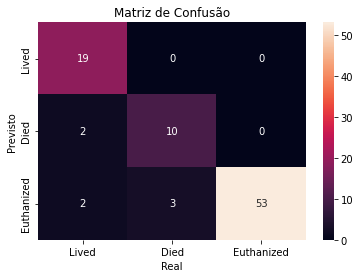

In [27]:
## SVM com melhores parâmetros, sem balanceamento

clf = Pipe(steps=[('preprocessor', preprocessor),
                  ('classifier', SVC(random_state=1, C=10, gamma=0.01, kernel='rbf'))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

Acurácia:  0.9213483146067416
Kappa:  0.8535496003761166
F1:  0.9193498474397351


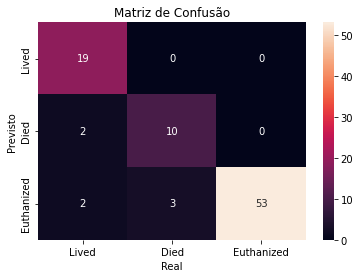

In [34]:
## regressão logistica, RandomOverSampler.

clf_reg = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('ros', ros),
                      ('classifier', SVC(random_state=1, C=100, gamma=0.01, kernel='rbf'))])

clf_reg.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

### Decision Tree

Acurácia:  0.6629213483146067
Kappa:  0.4927811550151976
F1:  0.6705412765268044


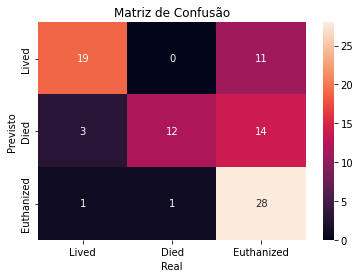

In [35]:
## Decision Tree, RandomUnderSampler

clf = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('ros', ros),
                      ('classifier', DecisionTreeClassifier(min_samples_leaf=5, random_state=1))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

Acurácia:  0.8089887640449438
Kappa:  0.6500925069380203
F1:  0.8068697276723553


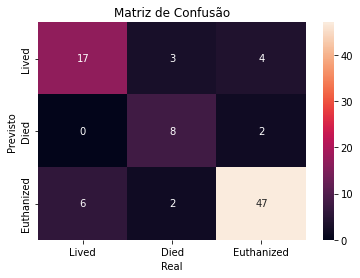

In [36]:
## Decision Tree sem Balanceamento

clf = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(min_samples_leaf=5, random_state=1))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

Acurácia:  0.8089887640449438
Kappa:  0.6500925069380203
F1:  0.8068697276723553


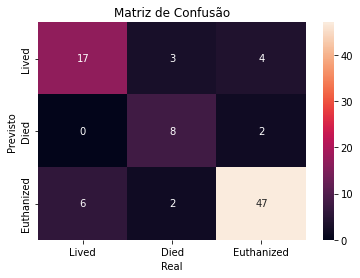

In [37]:
## Decision Tree, RandomOverSampler

clf_tree = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('ros', ros),
                      ('classifier', DecisionTreeClassifier(min_samples_leaf=5, random_state=1))])

clf_tree.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

In [38]:
#GridSearch com OverSampler
pipe = Pipe(steps=[('preprocessor', preprocessor),
                   ('ros', ros),
                   ('classiffier', DecisionTreeClassifier(random_state=1))])

param_grid = {'classiffier__criterion': ['gini', 'entropy'],
              'classiffier__max_depth': [2,4,6,8,10,12]}

grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        died       0.63      0.83      0.72        23
  euthanized       0.45      1.00      0.62        13
       lived       0.97      0.55      0.70        53

    accuracy                           0.69        89
   macro avg       0.68      0.79      0.68        89
weighted avg       0.80      0.69      0.69        89



In [39]:
grid_search.best_params_

{'classiffier__criterion': 'gini', 'classiffier__max_depth': 4}

Acurácia:  0.8089887640449438
Kappa:  0.6500925069380203
F1:  0.8068697276723553


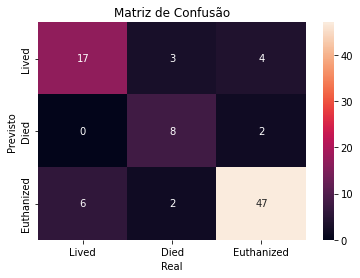

In [41]:
# Decision Tree com melhores parâmetros e OverSampler

clf_tree = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('ros', ros),
                      ('classifier', DecisionTreeClassifier(criterion='gini',max_depth=4 ,random_state=1))])

clf_tree.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

Acurácia:  0.8089887640449438
Kappa:  0.6500925069380203
F1:  0.8068697276723553


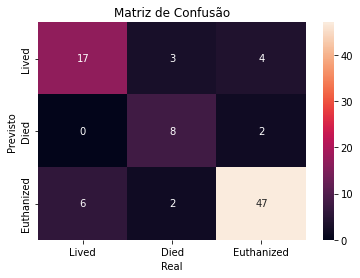

In [40]:
# Decision Tree com melhores parâmetros e OverSampler

clf_tree = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('ros', ros),
                      ('classifier', DecisionTreeClassifier(criterion='entropy',max_depth=10 ,random_state=1))])

clf_tree.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

In [42]:
#GridSearch sem Balanceamento
pipe = Pipe(steps=[('preprocessor', preprocessor),
                   ('classiffier', DecisionTreeClassifier(random_state=1))])

param_grid = {'classiffier__criterion': ['gini', 'entropy'],
              'classiffier__max_depth': [2,4,6,8,10,12]}

grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        died       0.78      0.91      0.84        23
  euthanized       0.92      0.85      0.88        13
       lived       0.94      0.89      0.91        53

    accuracy                           0.89        89
   macro avg       0.88      0.88      0.88        89
weighted avg       0.89      0.89      0.89        89



In [43]:
grid_search.best_params_

{'classiffier__criterion': 'gini', 'classiffier__max_depth': 6}

Acurácia:  0.8876404494382022
Kappa:  0.8019581664441477
F1:  0.8890891240318535


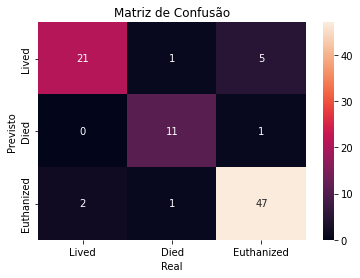

In [44]:
## Decision Tree com os melhores parâmetros sem Balanceamento

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='gini',max_depth=6 ,random_state=1))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

### Random Forest

Acurácia:  0.7078651685393258
Kappa:  0.523279769262464
F1:  0.7192577556859047


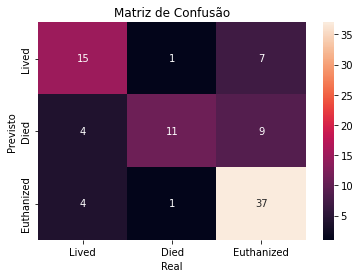

In [45]:
#RF com UnderSampler

clf = Pipe(steps=[
                  ('preprocessor', preprocessor),
                  ('rus', rus),
                  ('classifier', RandomForestClassifier(min_samples_leaf=5, random_state=1))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

Acurácia:  0.7865168539325843
Kappa:  0.5668545081967213
F1:  0.7613291850036807


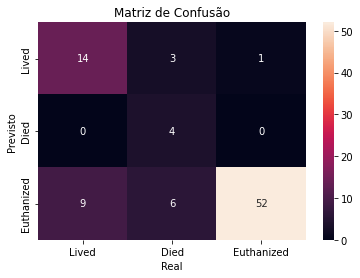

In [46]:
#RF sem Balanceamento

clf = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(min_samples_leaf=5, random_state=1))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

Acurácia:  0.9101123595505618
Kappa:  0.8433098591549295
F1:  0.9113389816127899


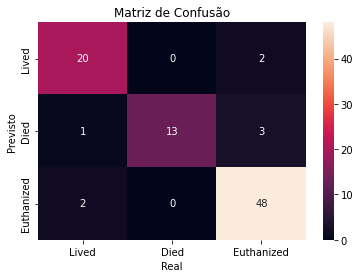

In [11]:
#RF com OverSampler

clf = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('ros', ros),
                      ('classifier', RandomForestClassifier(min_samples_leaf=5, random_state=1))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

In [ ]:
#GridSearch com UnderSampler

pipe = Pipe(steps=[('preprocessor', preprocessor),
                   ('rus', rus),
                   ('classiffier', RandomForestClassifier(random_state=1))])

param_grid = {'classiffier__n_estimators': [20, 50, 100, 150, 200, 300, 400, 500],
              'classiffier__max_features': [3,4,8,9,10,11]}

grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        died       0.73      0.83      0.78        23
  euthanized       0.57      1.00      0.72        13
       lived       0.95      0.72      0.82        53

    accuracy                           0.79        89
   macro avg       0.75      0.85      0.77        89
weighted avg       0.84      0.79      0.79        89



In [ ]:
#GridSearch sem Balanceamento

pipe = Pipe(steps=[('preprocessor', preprocessor),
                   ('classiffier', RandomForestClassifier(random_state=1))])

param_grid = {'classiffier__n_estimators': [20, 50, 100, 150, 200, 300, 400, 500],
              'classiffier__max_features': [3,4,8,9,10,11]}

grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        died       1.00      0.91      0.95        23
  euthanized       1.00      1.00      1.00        13
       lived       0.96      1.00      0.98        53

    accuracy                           0.98        89
   macro avg       0.99      0.97      0.98        89
weighted avg       0.98      0.98      0.98        89



In [ ]:
grid_search.best_params_

{'classiffier__max_features': 11, 'classiffier__n_estimators': 50}

Acurácia:  0.9775280898876404
Kappa:  0.9591180523656408
F1:  0.9772254378995952


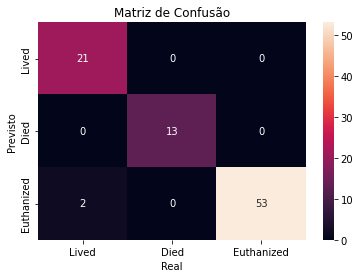

In [ ]:
#RF com melhores parâmetros sem Balanceamento

clf = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(max_features=11, n_estimators=50, random_state=1))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test) 

In [ ]:
#GridSearch com RandomOverSampler

pipe = Pipe(steps=[('preprocessor', preprocessor),
                   ('ros', ros),
                   ('classiffier', RandomForestClassifier(random_state=1))])

param_grid = {'classiffier__n_estimators': [20, 50, 100, 150, 200, 300, 400, 500],
              'classiffier__max_features': [3,4,8,9,10,11]}

grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        died       1.00      0.91      0.95        23
  euthanized       1.00      1.00      1.00        13
       lived       0.96      1.00      0.98        53

    accuracy                           0.98        89
   macro avg       0.99      0.97      0.98        89
weighted avg       0.98      0.98      0.98        89



In [ ]:
grid_search.best_params_

{'classiffier__max_features': 4, 'classiffier__n_estimators': 100}

Acurácia:  0.9775280898876404
Kappa:  0.9591180523656408
F1:  0.9772254378995952


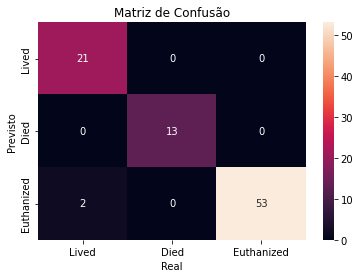

In [ ]:
#RF com melhores parâmetros e OverSampler

clf = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('ros', ros),
                      ('classifier', RandomForestClassifier(max_features=4, n_estimators=100, random_state=1))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

### KNN

Acurácia:  0.6853932584269663
Kappa:  0.49287749287749294
F1:  0.6957439986617224


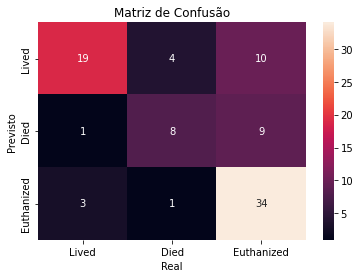

In [12]:
#KNN com UnderSampler

clf = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('rus', rus),
                      ('classifier', KNeighborsClassifier())])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

Acurácia:  0.8089887640449438
Kappa:  0.6434967012252591
F1:  0.8011251478619396


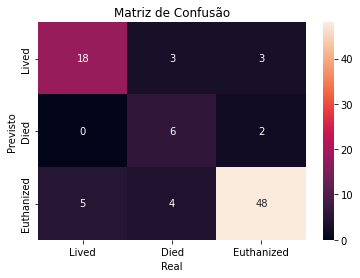

In [13]:
#KNN sem Balanceamento

clf = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier())])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

Acurácia:  0.8764044943820225
Kappa:  0.7953595317725752
F1:  0.8806140689166372


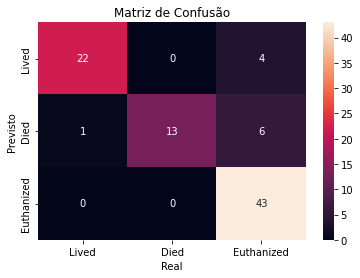

In [14]:
#KNN com OverSampler

clf = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('ros', ros),
                      ('classifier', KNeighborsClassifier())])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

In [15]:
#KNN GridSearch com UnderSampler

pipe = Pipe(steps=[('preprocessor', preprocessor),
                   ('rus', rus),
                   ('classiffier', KNeighborsClassifier())])

param_grid = {'classiffier__n_neighbors': list(range(1,31)),
              'classiffier__weights': ["uniform", "distance"]}

grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        died       0.73      0.96      0.83        23
  euthanized       0.76      1.00      0.87        13
       lived       0.98      0.77      0.86        53

    accuracy                           0.85        89
   macro avg       0.82      0.91      0.85        89
weighted avg       0.88      0.85      0.86        89



In [16]:
#KNN GridSearch sem Balanceamento

pipe = Pipe(steps=[('preprocessor', preprocessor),
                   ('classiffier', KNeighborsClassifier())])

param_grid = {'classiffier__n_neighbors': list(range(1,31)),
              'classiffier__weights': ["uniform", "distance"]}

grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        died       1.00      0.96      0.98        23
  euthanized       1.00      1.00      1.00        13
       lived       0.98      1.00      0.99        53

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89



In [17]:
grid_search.best_params_

{'classiffier__n_neighbors': 3, 'classiffier__weights': 'distance'}

Acurácia:  0.9887640449438202
Kappa:  0.9796989051094891
F1:  0.9886917054616309


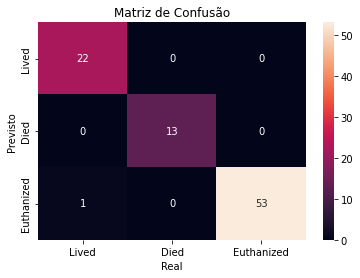

In [18]:
clf = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier(n_neighbors=3, weights='distance'))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)

In [19]:
#KNN GridSearch com OverSampler

pipe = Pipe(steps=[('preprocessor', preprocessor),
                   ('ros', ros),
                   ('classiffier', KNeighborsClassifier())])

param_grid = {'classiffier__n_neighbors': list(range(1,31)),
              'classiffier__weights': ["uniform", "distance"]}

grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        died       1.00      1.00      1.00        23
  euthanized       1.00      1.00      1.00        13
       lived       1.00      1.00      1.00        53

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



In [20]:
grid_search.best_params_

{'classiffier__n_neighbors': 3, 'classiffier__weights': 'distance'}

Acurácia:  1.0
Kappa:  1.0
F1:  1.0


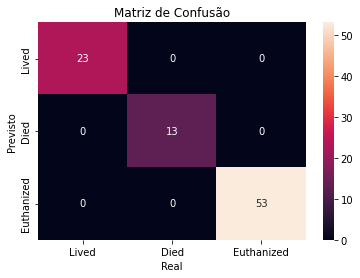

In [11]:
clf = Pipe(steps=[
                      ('preprocessor', preprocessor),
                      ('ros', ros),
                      ('classifier', KNeighborsClassifier(n_neighbors=3, weights='distance'))])

clf.fit(X_train, y_train)
predict_and_evaluate(X_test, y_test)